In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [68]:
#reading the csv file
dim_city_df = pd.read_csv('dim_city.csv')

In [72]:
#reading the csv file
trips_df = pd.read_csv('fact_trips.csv') 

In [74]:
fact_trips_df= pd.merge(dim_city_df,trips_df,on ='city_id', how='right' )

In [76]:
fact_trips_df.shape

(425903, 9)

In [78]:
#findg the first 10 rows
fact_trips_df.head(10)

,city_id,city_name,trip_id,date,passenger_type,distance_travelled(km),fare_amount,passenger_rating,driver_rating
0,UP01,Lucknow,TRPLUC240113d55de2fb,2024-01-13,repeated,11,158,5,5
1,GJ02,Vadodara,TRPVAD240129a3b6dba8,2024-01-29,repeated,7,74,5,5
2,TN01,Coimbatore,TRPCOI240107a42430fb,2024-01-07,repeated,11,155,8,8
3,KL01,Kochi,TRPKOC240325d7601389,2024-03-25,repeated,36,427,9,10
4,AP01,Visakhapatnam,TRPVIS2406027be97166,2024-06-02,new,17,265,8,8
5,CH01,Chandigarh,TRPCHA24052276da3b06,2024-05-22,repeated,22,224,8,6
6,AP01,Visakhapatnam,TRPVIS24021227b67207,2024-02-12,repeated,10,117,2,2
7,AP01,Visakhapatnam,TRPVIS24062261a0e18c,2024-06-22,repeated,26,391,7,10
8,GJ01,Surat,TRPSUR24020926a565d2,2024-02-09,new,9,91,7,7
9,UP01,Lucknow,TRPLUC240327a61cfe66,2024-03-27,new,5,71,7,8


In [80]:
#checking for the total null values in each row
fact_trips_df.isnull().sum()

city_id                   0
city_name                 0
trip_id                   0
date                      0
passenger_type            0
distance_travelled(km)    0
fare_amount               0
passenger_rating          0
driver_rating             0
dtype: int64

In [82]:
#checking to see duplicate values
fact_trips_df.duplicated().sum()

0

In [84]:
#checking the data type and column names 
fact_trips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425903 entries, 0 to 425902
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   city_id                 425903 non-null  object
 1   city_name               425903 non-null  object
 2   trip_id                 425903 non-null  object
 3   date                    425903 non-null  object
 4   passenger_type          425903 non-null  object
 5   distance_travelled(km)  425903 non-null  int64 
 6   fare_amount             425903 non-null  int64 
 7   passenger_rating        425903 non-null  int64 
 8   driver_rating           425903 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 29.2+ MB


In [86]:
#having a look at descriptive nature of the facts.csv dataset
fact_trips_df.describe()

,distance_travelled(km),fare_amount,passenger_rating,driver_rating
count,425903.000000,425903.000000,425903.00000,425903.000000
mean,19.127172,254.020495,7.66104,7.830947
std,9.491735,159.638784,1.45533,1.442553
min,5.000000,58.000000,1.00000,1.000000
25%,12.000000,135.000000,7.00000,7.000000
50%,17.000000,199.000000,8.00000,8.000000
75%,25.000000,337.000000,9.00000,9.000000
max,45.000000,802.000000,10.00000,10.000000


In [88]:
#finding the unique cities using city id
fact_trips_df.nunique()

city_id                       10
city_name                     10
trip_id                   425903
date                         182
passenger_type                 2
distance_travelled(km)        41
fare_amount                  273
passenger_rating              10
driver_rating                 10
dtype: int64

In [23]:
#there are ten different cities


In [154]:
performance_by_city = fact_trips_df.groupby('city_name')['trip_id'].nunique()

In [156]:
sorted_performing_cities = performance_by_city.sort_values(ascending=False)
best_3_performing_cities = sorted_performing_cities.head(3)

In [158]:
best_3_performing_cities

city_name
Jaipur     76888
Lucknow    64299
Surat      54843
Name: trip_id, dtype: int64

In [ ]:
# Set a pastel color palette using Seaborn
sns.set_palette("pastel")

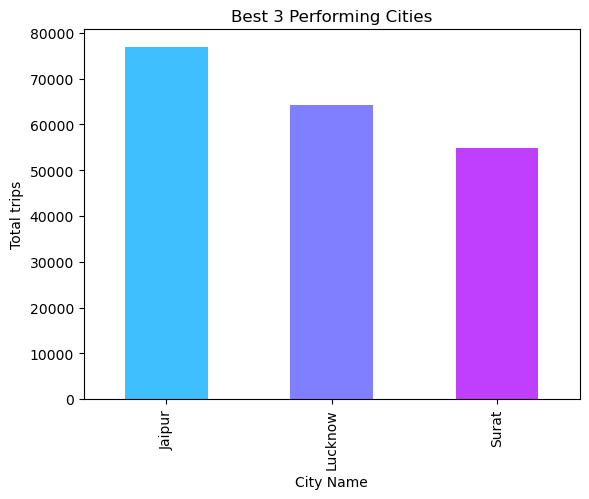

In [175]:
best_3_performing_cities.plot(kind='bar', x='city_name', color=sns.color_palette("cool", len(best_3_performing_cities)))

plt.title('Best 3 Performing Cities')
plt.xlabel('City Name')
plt.ylabel('Total trips')
plt.show()

In [162]:
sorted_performing_cities = performance_by_city.sort_values(ascending=False)
worst_3_performing_cities = sorted_performing_cities.tail(3)

In [177]:
worst_3_performing_cities

,city_name,trip_id
0,Visakhapatnam,28366
1,Coimbatore,21104
2,Mysore,16238


In [ ]:
# Set a pastel color palette using Seaborn
sns.set_palette("pastel")

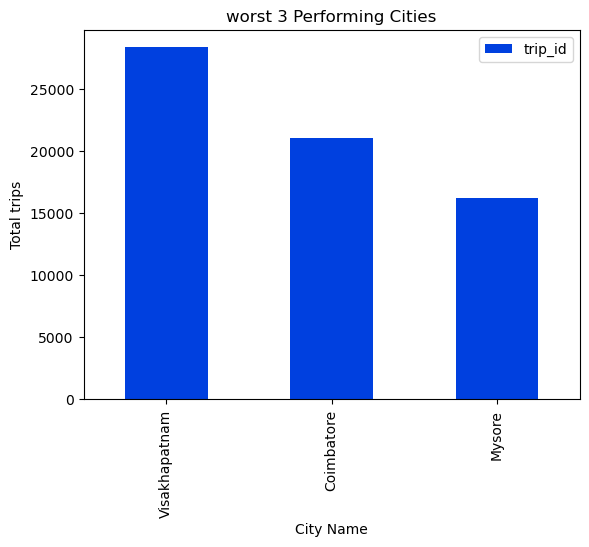

In [195]:
worst_3_performing_cities.plot(kind='bar', x='city_name', color=sns.color_palette("winter", len(best_3_performing_cities)))

plt.title('worst 3 Performing Cities')
plt.xlabel('City Name')
plt.ylabel('Total trips')
plt.show()

In [197]:
average_fair_trip_by_city = fact_trips_df.groupby('city_name')['fare_amount'].mean()

In [199]:
#finding average fair trip by city
average_fair_trip_by_city

city_name
Chandigarh       283.686950
Coimbatore       166.982183
Indore           179.838609
Jaipur           483.918128
Kochi            335.245079
Lucknow          147.180376
Mysore           249.707168
Surat            117.272925
Vadodara         118.566165
Visakhapatnam    282.672284
Name: fare_amount, dtype: float64

In [201]:
#number_of_trips_in_each_city
sorted_performing_cities 

city_name
Jaipur           76888
Lucknow          64299
Surat            54843
Kochi            50702
Indore           42456
Chandigarh       38981
Vadodara         32026
Visakhapatnam    28366
Coimbatore       21104
Mysore           16238
Name: trip_id, dtype: int64

In [203]:

#the performance is in terms of trips
performance_by_city = pd.Series({
    'Jaipur': 76888,
    'Lucknow': 64299,
    'Surat': 54843,
    'Kochi': 50702,
    'Indore': 42456,
    'Chandigarh': 38981,
    'Vadodara': 32026,
    'Visakhapatnam': 28366,
    'Coimbatore': 21104,
    'Mysore': 16238
})

# Sort values in descending order
new_sorted_performing_cities = performance_by_city.sort_values(ascending=False)

# Convert to DataFrame and rename the column
sorted_performing_cities_df = new_sorted_performing_cities.reset_index()
sorted_performing_cities_df.columns = ['city_name', 'total_number_of_trips']

# Display the DataFrame
print(sorted_performing_cities_df)


       city_name  total_number_of_trips
0         Jaipur                  76888
1        Lucknow                  64299
2          Surat                  54843
3          Kochi                  50702
4         Indore                  42456
5     Chandigarh                  38981
6       Vadodara                  32026
7  Visakhapatnam                  28366
8     Coimbatore                  21104
9         Mysore                  16238


In [211]:
# Group by city_name to sum the fare_amount for each city
fare_sum_by_city = fact_trips_df.groupby('city_name')['fare_amount'].sum()

# Align the total_number_of_trips with the grouped fare amounts
total_trips_by_city = sorted_performing_cities_df.set_index('city_name')['total_number_of_trips']

# Compute average fare per trip for each city
average_fare_per_trip_by_city = fare_sum_by_city / total_trips_by_city

# Convert to DataFrame for clarity
average_fare_per_trip_by_city_df = average_fare_per_trip_by_city.reset_index()
average_fare_per_trip_by_city_df.columns = ['city_name', 'average_fare_per_trip']

# Display the result
print(average_fare_per_trip_by_city_df)


       city_name  average_fare_per_trip
0     Chandigarh             283.686950
1     Coimbatore             166.982183
2         Indore             179.838609
3         Jaipur             483.918128
4          Kochi             335.245079
5        Lucknow             147.180376
6         Mysore             249.707168
7          Surat             117.272925
8       Vadodara             118.566165
9  Visakhapatnam             282.672284


In [226]:
distance_covered_per_city =fact_trips_df.groupby('city_name')['distance_travelled(km)'].sum()


In [228]:
distance_covered_per_city_df = distance_covered_per_city.reset_index()


In [230]:
merged_distance_and_average_fair_df = pd.merge(average_fare_per_trip_by_city_df,distance_covered_per_city_df,on='city_name')
merged_distance_and_average_fair_df

,city_name,average_fare_per_trip,distance_travelled(km)
0,Chandigarh,283.686950,916783
1,Coimbatore,166.982183,316121
2,Indore,179.838609,700629
3,Jaipur,483.918128,2308418
4,Kochi,335.245079,1220167
5,Lucknow,147.180376,804571
6,Mysore,249.707168,267877
7,Surat,117.272925,603122
8,Vadodara,118.566165,368867
9,Visakhapatnam,282.672284,639765


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Chandigarh'),
  Text(1, 0, 'Coimbatore'),
  Text(2, 0, 'Indore'),
  Text(3, 0, 'Jaipur'),
  Text(4, 0, 'Kochi'),
  Text(5, 0, 'Lucknow'),
  Text(6, 0, 'Mysore'),
  Text(7, 0, 'Surat'),
  Text(8, 0, 'Vadodara'),
  Text(9, 0, 'Visakhapatnam')])

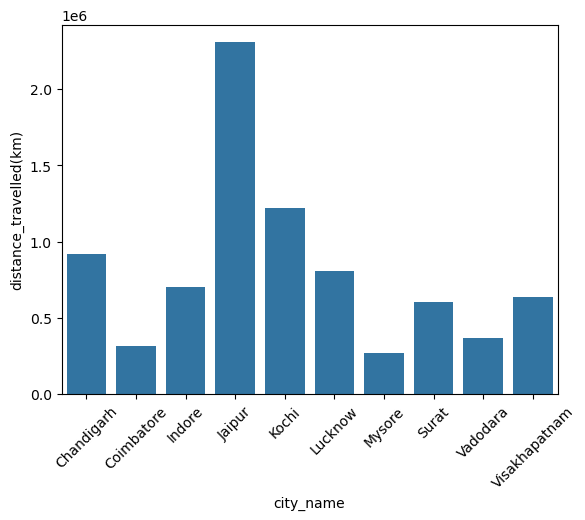

In [234]:
sns.barplot(data=merged_distance_and_average_fair_df,x='city_name',y='distance_travelled(km)')
plt.xticks(rotation=45)